In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
svm = LinearSVC(dual=False).fit(X, y)

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)
lr = LogisticRegression().fit(Xs, y)

In [2]:
# Calcular las distancias desde cada punto al hiperplano para SVM
distances_svm = svm.decision_function(X)

# Calcular las distancias desde cada punto al hiperplano para lr
distances_lr = lr.decision_function(Xs)

# Encontrar el índice del elemento con la mayor distancia en valor absoluto para SVM
index_max_distance_svm = abs(distances_svm).argmax()

# Encontrar el índice del elemento con la mayor distancia en valor absoluto para lr
index_max_distance_lr = abs(distances_lr).argmax()

# Imprimir los índices
print("El elemento que se encuentra a mayor distancia para SVM es:", index_max_distance_svm)
print("El elemento que se encuentra a mayor distancia para lr es:", index_max_distance_lr)


El elemento que se encuentra a mayor distancia para SVM es: 44
El elemento que se encuentra a mayor distancia para lr es: 98


In [5]:
import numpy as np

# Calcular las distancias desde cada punto al hiperplano para SVM
distances_svm = svm.decision_function(X)
max_distance_svm = np.max(np.abs(distances_svm))

# Calcular las distancias desde cada punto al hiperplano para lr
distances_lr = lr.decision_function(Xs)
max_distance_lr = np.max(np.abs(distances_lr))

# Encontrar los índices de los elementos con la mayor distancia en valor absoluto para SVM
indices_max_distance_svm = np.where(np.abs(distances_svm) == max_distance_svm)[0]

# Encontrar los índices de los elementos con la mayor distancia en valor absoluto para lr
indices_max_distance_lr = np.where(np.abs(distances_lr) == max_distance_lr)[0]

# Imprimir los índices
print("El elemento que se encuentra a mayor distancia para SVM es:", indices_max_distance_svm)
print("El elemento que se encuentra a mayor distancia para lr es:", indices_max_distance_lr)


El elemento que se encuentra a mayor distancia para SVM es: [14]
El elemento que se encuentra a mayor distancia para lr es: [32]


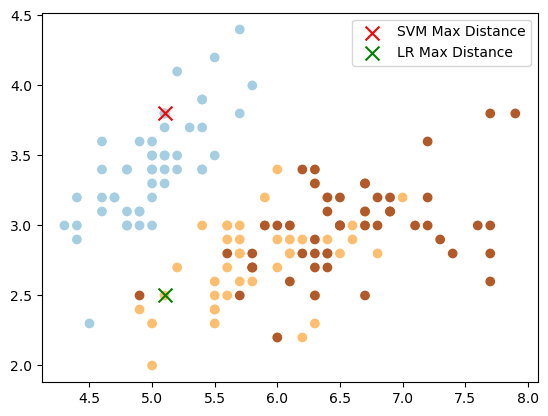

In [6]:
import matplotlib.pyplot as plt

# Calcular las distancias desde cada punto al hiperplano para SVM y lr
distances_svm = svm.decision_function(X)
distances_lr = lr.decision_function(Xs)

# Encontrar los índices de los elementos con la mayor distancia en valor absoluto
index_max_distance_svm = abs(distances_svm).argmax()
index_max_distance_lr = abs(distances_lr).argmax()

# Crear un gráfico de dispersión para los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Resaltar el punto con la mayor distancia para SVM en rojo
plt.scatter(X[index_max_distance_svm, 0], X[index_max_distance_svm, 1], c='red', marker='x', s=100, label='SVM Max Distance')

# Resaltar el punto con la mayor distancia para lr en verde
plt.scatter(X[index_max_distance_lr, 0], X[index_max_distance_lr, 1], c='green', marker='x', s=100, label='LR Max Distance')

plt.legend()
plt.show()


In [9]:
svm_df = svm.decision_function(X)
svm_dis = svm_df / np.linalg.norm(svm.coef_, axis=1)
print(f'SVM correcto: {np.fabs(svm_dis).max(axis=1).argsort()[-1]} ({np.fabs(svm_dis).max(axis=1).max():0.4f}) Error: {np.fabs(svm_df).max(axis=1).argsort()[-1]}')

lr_df = lr.decision_function(Xs)
lr_dis = lr_df / np.linalg.norm(lr.coef_, axis=1)
print(f'LR correcto: {np.fabs(lr_dis).max(axis=1).argsort()[-1]} ({np.fabs(lr_dis).max(axis=1).max():0.4f}) Error: {np.fabs(lr_df).max(axis=1).argsort()[-1]}')

SVM correcto: 118 (3.7466) Error: 14
LR correcto: 118 (3.2155) Error: 32


In [22]:
svm_df

array([[ 1.40874739e+00, -8.03201647e-01, -7.19493829e+00],
       [ 1.14458899e+00, -3.63803595e-01, -6.53155257e+00],
       [ 1.28038178e+00, -5.95955150e-01, -6.69686090e+00],
       [ 1.05355238e+00, -4.29543545e-01, -6.23697292e+00],
       [ 1.43589610e+00, -8.98815733e-01, -7.20854707e+00],
       [ 1.31455631e+00, -1.21634088e+00, -7.05742020e+00],
       [ 1.22817148e+00, -8.36798021e-01, -6.48452517e+00],
       [ 1.26341336e+00, -6.77713427e-01, -6.87314108e+00],
       [ 1.00737041e+00, -3.01337258e-01, -6.00765081e+00],
       [ 1.15194465e+00, -3.16906960e-01, -6.67863078e+00],
       [ 1.47327434e+00, -9.25883309e-01, -7.50930924e+00],
       [ 1.14522804e+00, -6.47839292e-01, -6.56495265e+00],
       [ 1.16960135e+00, -2.73265509e-01, -6.63301510e+00],
       [ 1.32236256e+00, -4.23658787e-01, -6.62204325e+00],
       [ 1.92762141e+00, -1.29682335e+00, -8.55974969e+00],
       [ 1.76005042e+00, -1.73206108e+00, -8.08203629e+00],
       [ 1.64053777e+00, -1.38003442e+00